In [11]:
import pandas as pd
import scipy as sp
import numpy as np

from abtools import ABtest, LognormalModel
from abtools.plotting import qqplot, ppplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [12]:
data = pd.read_csv('data.csv').query('revenue > 0')

In [13]:
log_data = np.log(data.revenue)

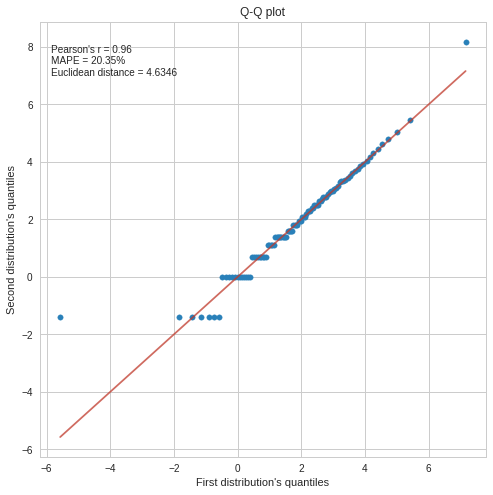

In [14]:
qqplot(sp.stats.norm(log_data.mean(), log_data.std()).rvs(10000), log_data, num_points=100)[0]

In [15]:
a = data.query('abgroup == "control"')['revenue']
b = data.query('abgroup == "test"')['revenue']

In [16]:
test = ABtest(LognormalModel, [a, b], 5000)

test.estimate()

ABtest for 2 groups


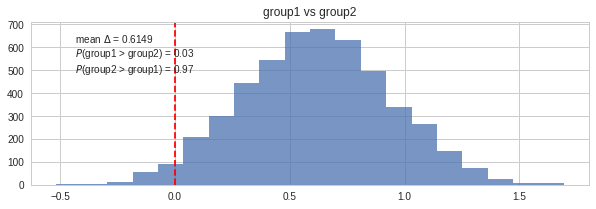

In [17]:
test.plot()

In [18]:
test.probabilities_df

,group1,group2,mean
group1,-,0.9744,21.8023758029
group2,0.0256,-,22.4172415648
mean,21.8023758029,22.4172415648,-
